# **Price Correlation Study**

1. Answer business requirement 1: "The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visualisations of the correlated variables against the sale price to show that."

## Inputs

1. House_price_records_clean.csv

## Outputs

1. Code which understands business requirement 1 and can be used to build stramplit app.
2. Data visualisations for the above.


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing'

# Load Content

Load content and check data.

In [4]:
import numpy as np
import pandas as pd

house_prices_clean_df = pd.read_csv(f"outputs/datasets/clean_data/House_prices_records_clean.csv")

In [5]:
house_prices_clean_df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,548,RFn,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,460,RFn,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,608,RFn,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,0.0,3.0,No,216,ALQ,540,642,Unf,1998.0,...,9550,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,0.0,4.0,Av,655,GLQ,490,836,RFn,2000.0,...,14260,84.0,350.0,84,5,8,1145,2000,2000,250000


In [6]:
house_prices_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1stFlrSF      1460 non-null   int64  
 1   2ndFlrSF      1460 non-null   float64
 2   BedroomAbvGr  1460 non-null   float64
 3   BsmtExposure  1460 non-null   object 
 4   BsmtFinSF1    1460 non-null   int64  
 5   BsmtFinType1  1460 non-null   object 
 6   BsmtUnfSF     1460 non-null   int64  
 7   GarageArea    1460 non-null   int64  
 8   GarageFinish  1460 non-null   object 
 9   GarageYrBlt   1460 non-null   float64
 10  GrLivArea     1460 non-null   int64  
 11  KitchenQual   1460 non-null   object 
 12  LotArea       1460 non-null   int64  
 13  LotFrontage   1460 non-null   float64
 14  MasVnrArea    1460 non-null   float64
 15  OpenPorchSF   1460 non-null   int64  
 16  OverallCond   1460 non-null   int64  
 17  OverallQual   1460 non-null   int64  
 18  TotalBsmtSF   1460 non-null 

---

# Transform Catagorical data.

Before we perform any correlation study we need to transform our catagorical variables into numbers. We have already seen that these variables relate to quality ratings so we will use the OrdinalEncoder set to ordered. Note that some catagorical variables such as OverallCond and OverallQual are already numbers. No action is needed here.

Get the columns which are still objects and there associated categories.

In [7]:
cat_columns = house_prices_clean_df.columns[house_prices_clean_df.dtypes=='object'].to_list()

for columns in cat_columns:
   print(columns)
   print(house_prices_clean_df[columns].unique())

BsmtExposure
['No' 'Gd' 'Mn' 'Av' 'None']
BsmtFinType1
['GLQ' 'ALQ' 'Unf' 'Rec' 'None' 'BLQ' 'LwQ']
GarageFinish
['RFn' 'Unf' 'None' 'Fin']
KitchenQual
['Gd' 'TA' 'Ex' 'Fa']


Manually order the variables, reflecting low to high quality. Run through the ordinal encoder. We can see the variables have been transformed.

In [8]:
from sklearn.preprocessing import OrdinalEncoder

# Aspects of this code were inspired by this discussion on Stack Exchange.
# https://datascience.stackexchange.com/questions/72343/encoding-with-ordinalencoder-how-to-give-levels-as-user-input

bsmt_exposure_categories = ['None', 'No', 'Mn', 'Av', 'Gd']
bsmt_fin_type1_categories = [ 'None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
garage_finish_categories = ['None', 'Unf', 'RFn', 'Fin']
kitchen_quality_categories = ['Fa', 'TA', 'Gd', 'Ex']

categories = [bsmt_exposure_categories, bsmt_fin_type1_categories, garage_finish_categories, kitchen_quality_categories]
encoder = OrdinalEncoder(categories=categories, dtype='int64')
house_prices_clean_df[house_prices_clean_df.select_dtypes(include='object').columns] = encoder.fit_transform(X=house_prices_clean_df.select_dtypes(include='object'))
house_prices_clean_df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,1,706,6,150,548,2,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,4,978,5,284,460,2,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,2,486,6,434,608,2,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,0.0,3.0,1,216,5,540,642,1,1998.0,...,9550,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,0.0,4.0,3,655,6,490,836,2,2000.0,...,14260,84.0,350.0,84,5,8,1145,2000,2000,250000


---

At this stage I will also change the datatypes of measurements. This will be useful later on.

In [9]:
house_prices_clean_df[
    ['1stFlrSF', 'BsmtFinSF1', 'BsmtUnfSF', 'GarageArea', 'GrLivArea', 'LotArea', 'OpenPorchSF', 'TotalBsmtSF']
    ] = house_prices_clean_df[
        ['1stFlrSF', 'BsmtFinSF1', 'BsmtUnfSF', 'GarageArea', 'GrLivArea', 'LotArea', 'OpenPorchSF', 'TotalBsmtSF']
        ].astype(float)
house_prices_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1stFlrSF      1460 non-null   float64
 1   2ndFlrSF      1460 non-null   float64
 2   BedroomAbvGr  1460 non-null   float64
 3   BsmtExposure  1460 non-null   int64  
 4   BsmtFinSF1    1460 non-null   float64
 5   BsmtFinType1  1460 non-null   int64  
 6   BsmtUnfSF     1460 non-null   float64
 7   GarageArea    1460 non-null   float64
 8   GarageFinish  1460 non-null   int64  
 9   GarageYrBlt   1460 non-null   float64
 10  GrLivArea     1460 non-null   float64
 11  KitchenQual   1460 non-null   int64  
 12  LotArea       1460 non-null   float64
 13  LotFrontage   1460 non-null   float64
 14  MasVnrArea    1460 non-null   float64
 15  OpenPorchSF   1460 non-null   float64
 16  OverallCond   1460 non-null   int64  
 17  OverallQual   1460 non-null   int64  
 18  TotalBsmtSF   1460 non-null 

## Correlation study

To check the correlation we can look at both Pearson and Spearman correlations. In both cases we check every value against SalePrice and list the results in order (removing SalePrice from the to of the list).

In [10]:
corr_spearman = house_prices_clean_df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:]
corr_spearman

OverallQual     0.809829
GrLivArea       0.731310
KitchenQual     0.672849
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
1stFlrSF        0.575408
YearRemodAdd    0.571159
GarageYrBlt     0.563256
OpenPorchSF     0.477561
GarageFinish    0.463387
LotArea         0.456461
MasVnrArea      0.415906
LotFrontage     0.375590
BsmtExposure    0.344207
BsmtFinType1    0.305899
BsmtFinSF1      0.301871
2ndFlrSF        0.279845
BedroomAbvGr    0.223576
BsmtUnfSF       0.185197
OverallCond    -0.129325
Name: SalePrice, dtype: float64

In [11]:
corr_pearson = house_prices_clean_df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:]
corr_pearson

OverallQual     0.790982
GrLivArea       0.708624
KitchenQual     0.659600
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
GarageYrBlt     0.466754
GarageFinish    0.404100
BsmtFinSF1      0.386420
BsmtExposure    0.374696
LotFrontage     0.334771
OpenPorchSF     0.315856
2ndFlrSF        0.312479
LotArea         0.263843
BsmtFinType1    0.253330
BsmtUnfSF       0.214479
BedroomAbvGr    0.155784
OverallCond    -0.077856
Name: SalePrice, dtype: float64

Both correlation studies produce some strong results, including agreeing on the contents and order of the top three (OverallQual, GrLivArea, KitchenQual), but having some divergance thereafter.

Note also that the Spearman test is a more suitable test for the catagorical variables OverallQual and KitchenQual as they are non continuous. Interstingly however, both tests agree on the relative importance of these variables (first and third respectively). 

We can add the scores together and select the highest scoring category.

In [12]:
correlation_list = corr_pearson + corr_spearman
study_further = 1.2

categories_to_study = {
    'Spearman': corr_spearman,
    'Pearson': corr_pearson,
    'Score': correlation_list.sort_values(ascending=False),
    'Study': correlation_list.sort_values(ascending=False) >= study_further
}

categories_to_study_df = pd.DataFrame.from_dict(categories_to_study).query(f'Study == True')
categories_to_study_df


,Spearman,Pearson,Score,Study
GarageArea,0.649379,0.623431,1.272810,True
GrLivArea,0.731310,0.708624,1.439934,True
KitchenQual,0.672849,0.659600,1.332448,True
OverallQual,0.809829,0.790982,1.600810,True
TotalBsmtSF,0.602725,0.613581,1.216306,True


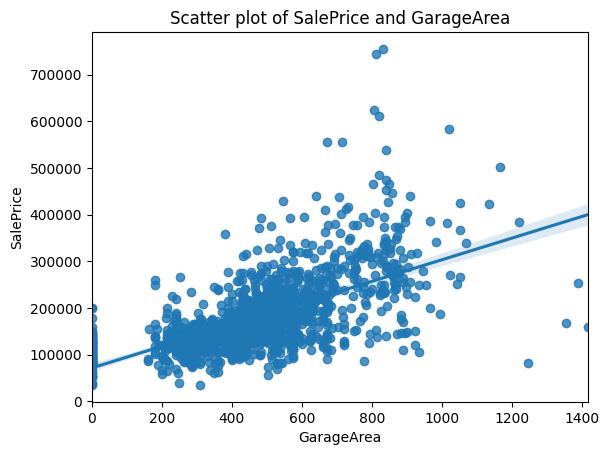

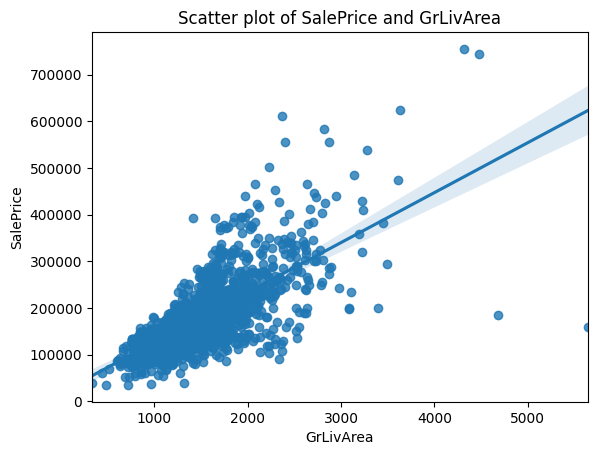

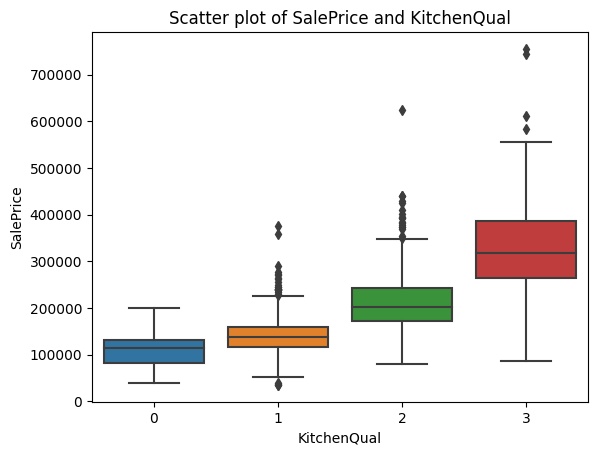

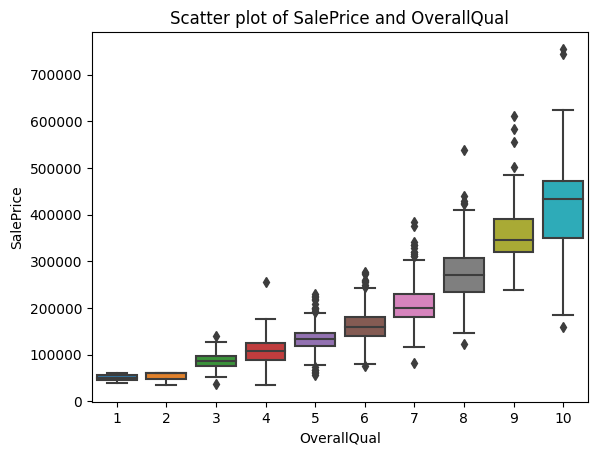

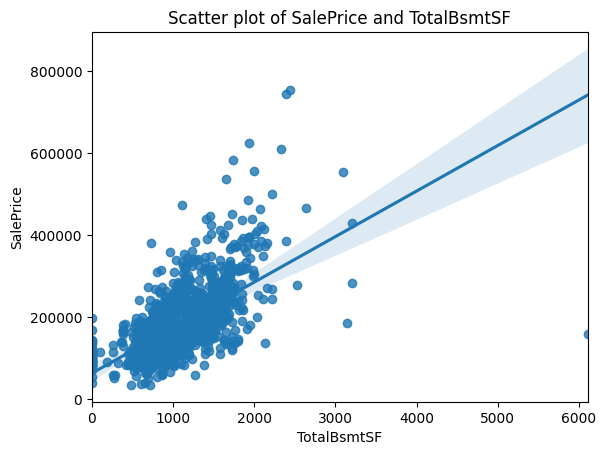

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

variables_to_study = ['GarageArea', 'GrLivArea', 'KitchenQual', 'OverallQual', 'TotalBsmtSF'] 

for category in variables_to_study:
    plt.figure()
    if house_prices_clean_df[category].dtype == 'float':
        sns.regplot(x=category, y="SalePrice", data=house_prices_clean_df).set(title=f'Scatter plot of SalePrice and {category}')
    else:
        sns.boxplot(x=category, y="SalePrice", data=house_prices_clean_df).set(title=f'Scatter plot of SalePrice and {category}')



---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
